<b>Simple-Linear-Regression (SLR) - Scratch</b> <br>
<i>Implementing linear regression using only NumPy, step-by-step. </i>

<b>requirements</b>

In [26]:
# example:- pip install numpy

<b>imports</b>

In [27]:
# imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import datasets

<b>(1) DATA PRE-PROCESSING</b>

In [28]:
# Read Raw Dataset 
dataset = pd.read_csv('../../../datasets/salary.csv')

# Feature-Matrix (X) & Dependent-Variable(y)
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

# Data-Splitting 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

# Custom Dataset :-
# X, y = datasets.make_regression(n_samples=150, n_features=1, noise=20, random_state=42)
# X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=24)

# Data Pre-Processing
# Normalize (if needed)
# Data Visualization

<b>(2) ML ALGORITHM - SCRATCH</b>

In [29]:
class SimpleLinearRegression: 
    
    # (2.1) Initialize Model-Parameters 
    def __init__(self, lr=0.001, iters=10000) -> None:     
        """
        Initializes the SLR-model's parameters and Hyper-parameters.
        
        Parameters: 
            weights : (np.array) weight-vector of model, Instance-Var so (value stays same for a specific instance)    
            bias    : (float) bias-term o the model, Instance-Var so (value stays same for a specific instance)              
            lr      : (float) Learning-Rate, [Hyper-Parameter]
            iters   : (int) Total number of Iterations for traininig the whole Dataset, [Hyper-Parameter]
                    
        Returns:     
            None
        """
        
        # Model-Parametes
        self.weights = None
        self.bias = None
        
        # Hyper-Parameter
        self.lr = lr
        self.iters = iters
         
        
    # (2.2) Making-Predictions
    def predict(self, X):
        """
        For given Features(x)[x1], predicts the output(ŷ)/y_pred is np array. 
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
        
        Returns : 
            The predited output(ŷ)/y_pred as np array.
        """
        
        # ŷ = wx + b   
        y_pred = np.dot(X, self.weights) + self.bias 
        return y_pred
    

    # (2.3) Cost-Function
    def mean_square_error(self, y_act, y_pred) -> np.ndarray:
        """
        Predicts the error score between real(y) and predicted values(ŷ), using MSE
        
        Parameters:
            y-act  : (np.array) Actual values
            y_pred : (np.array) Predited values
        
        Returns: 
            The loss-score mse as an int in np array 
        """

        mse = None
        mse = np.mean((y_act - y_pred)**2)
        return mse


    # (2.4) Fit Model to Data (Learning-&-Training)  
    def fit(self, X, y):
        """
        Learns the model-Params (w & b) using GD algo and Trains the model with iters
        
        Parameters:
            X : (np.array) Independent-Variable (Features)
            y : (np.array) Dependent-Variable
        """
        
        # Initialize Model-Parameters
        n_data, n_features = X.shape
        
        # Init With zero val : (Shows where two curves against weight, below small curve is where actual learning happens) Starting from 0 val<min, the slope increases and curve shifts from left --> right and eventually goes to min
        # self.weights = np.zeros(n_features)
        # self.bias = 0
        
        # Init With vals : (Shows actually where the MSE score is decreasing with change in weight) actual learning plot. Starting from val>min, the slope decreases and curve shifts from right --> to left and eventually goes to min
        self.weights = np.full(n_features,11401.06472749)
        self.bias = 11170.596516046198

        # Create empty list to Store all Costs & Weights
        cost_history = []
        weight_history = []
        
        
        # Training Model  
        for i in range(self.iters):                 
            # ŷ = wx + b   
            y_pred = self.predict(X)
            
            # Learning : Gradient-Descent / Back-prop Algo
            # Deriv of Cost-Func (J) w.r.t weights(w)
            dj_dw = (-2/n_data) * np.dot(X.T, (y- y_pred))
            
            # Deriv of Cost-Func (J) w.r.t bias(b)
            dj_db = (-2/n_data) * np.sum(y-y_pred)

            # Back-Prop Algo
            self.weights -= self.lr * dj_dw
            self.bias -= self.lr * dj_db
            
            cost = self.mean_square_error(y,y_pred)
            
            cost_history.append(cost)
            weight_history.append(int(self.weights.item()))
            
            if i % 1000 == 0:
                print (f"iter={i} weight={self.weights} bias={self.bias} cost={cost}")               
                
        return y_pred, self.weights, self.bias, cost_history, weight_history      

<b>(3) MODEL TRAINING</b>

In [30]:
# Creating object of Type SimpleLinearRegression
regressor = SimpleLinearRegression(0.001,10000)

# Training The SLR model with the Training-Datasets
y_train_pred, weights, bias, cost_history, weight_history = regressor.fit(X_train,y_train)

iter=0 weight=[11400.03352914] bias=11177.794327787586 cost=80227577.21753885
iter=1000 weight=[10588.43389886] bias=16844.247142625907 cost=46759093.906917684
iter=2000 weight=[10095.49325729] bias=20285.890201949056 cost=34412559.788911186
iter=3000 weight=[9796.095088] bias=22376.246614936532 cost=29857919.43325303
iter=4000 weight=[9614.24912884] bias=23645.86983210341 cost=28177711.160136495
iter=5000 weight=[9503.80104914] bias=24417.00297645817 cost=27557881.794785555
iter=6000 weight=[9436.71801708] bias=24885.36738432507 cost=27329226.54513684
iter=7000 weight=[9395.97368542] bias=25169.838646081167 cost=27244875.550952617
iter=8000 weight=[9371.22673359] bias=25342.61842483002 cost=27213758.44242004
iter=9000 weight=[9356.19613671] bias=25447.55996359996 cost=27202279.331203964


<b>(4) PREDICTION</b>

In [31]:
# Predicting on Test-Set using the trained SLR model (by the learned 'weights & bias')
y_pred = regressor.predict(X_test)

<b>(5) EVALUATION-VISUALIZATION</b>

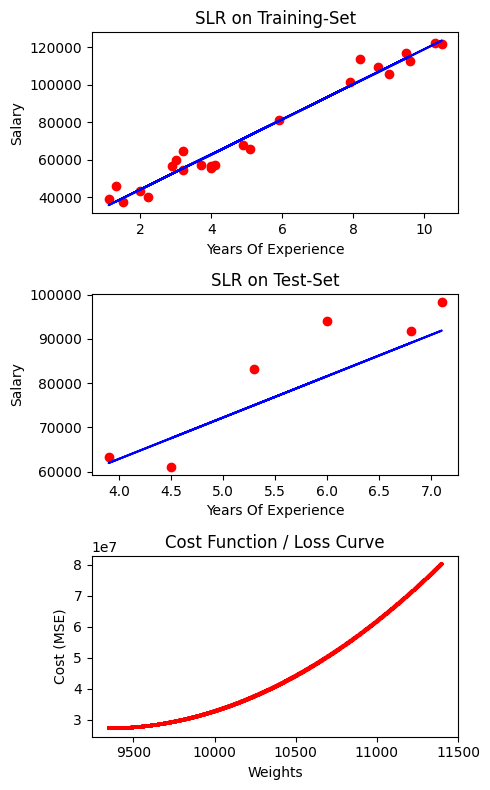

Text(0, 0.5, 'Salary')

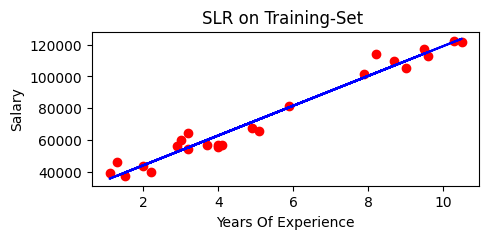

In [32]:
# pplVisualization 
# Multiple-Plots on Single-Figure 
fig, ax = plt.subplots(3, 1, figsize=(5, 8))

# Training-Set plot (X_train Vs y_train_pred)
ax[0].scatter(X_train, y_train, color='red')
ax[0].plot(X_train, y_train_pred, color='blue')
ax[0].set_title("SLR on Training-Set")
ax[0].set_xlabel('Years Of Experience')
ax[0].set_ylabel('Salary')

# Test-Set plot (X_test Vs y_pred)
ax[1].scatter(X_test, y_test, color='red')
ax[1].plot(X_test, y_pred, color='blue')
ax[1].set_title("SLR on Test-Set")
ax[1].set_xlabel('Years Of Experience')
ax[1].set_ylabel('Salary')

# Cost-Function / loss-Curve plot (MSE score Vs Weights)
ax[2].scatter(weight_history, cost_history, color='red', marker='+', s=10)
ax[2].set_title("Cost Function / Loss Curve")
ax[2].set_xlabel('Weights')
ax[2].set_ylabel('Cost (MSE)')

# Adjust the layout to prevent overlapping
plt.tight_layout()

# Show all 3 plots in one figure #
plt.show()

# Single-Plot on Single-Figure 
# Training-Set plot
plt.figure(figsize=(5, 2))
plt.scatter(X_train, y_train, color = 'red')
plt.plot(X_train, y_train_pred, color = 'blue')
plt.title("SLR on Training-Set ")
plt.xlabel('Years Of Experience')
plt.ylabel('Salary')
#plt.show()


<b>CONCLUSION</b>
- SLR showing Good Results on Linear Data